In [1]:
import mysql.connector
import pandas as pd

# Establish connection to MySQL
connection = mysql.connector.connect(
    host='localhost',  # Replace with your host
    user='root',  # Replace with your MySQL username
    password='Jagannath@123',  # Replace with your MySQL password
    database='Gene'  # Replace with your database name
)

In [2]:
query = "SELECT GeneType, COUNT(*) AS GeneCount FROM Gene_New GROUP BY GeneType"
df = pd.read_sql(query, connection)

/var/folders/pv/2m5s9svn5tzdnmz917lwq0480000gn/T/ipykernel_19929/1135658795.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


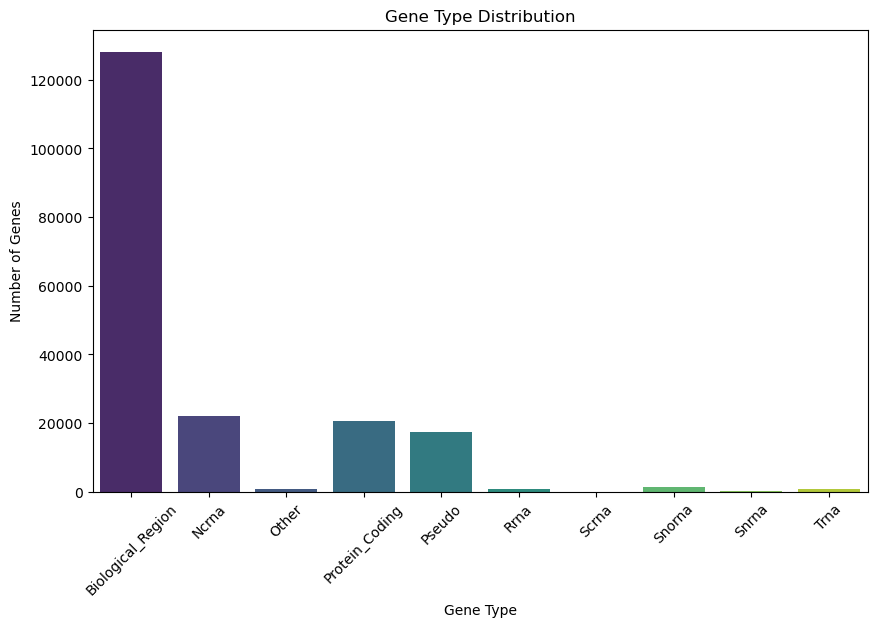

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='GeneType', y='GeneCount', data=df, palette='viridis')
plt.title('Gene Type Distribution')
plt.xlabel('Gene Type')
plt.ylabel('Number of Genes')
plt.xticks(rotation=45)
plt.show()

/var/folders/pv/2m5s9svn5tzdnmz917lwq0480000gn/T/ipykernel_19929/3525987514.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_common_genes = pd.read_sql(query, connection)


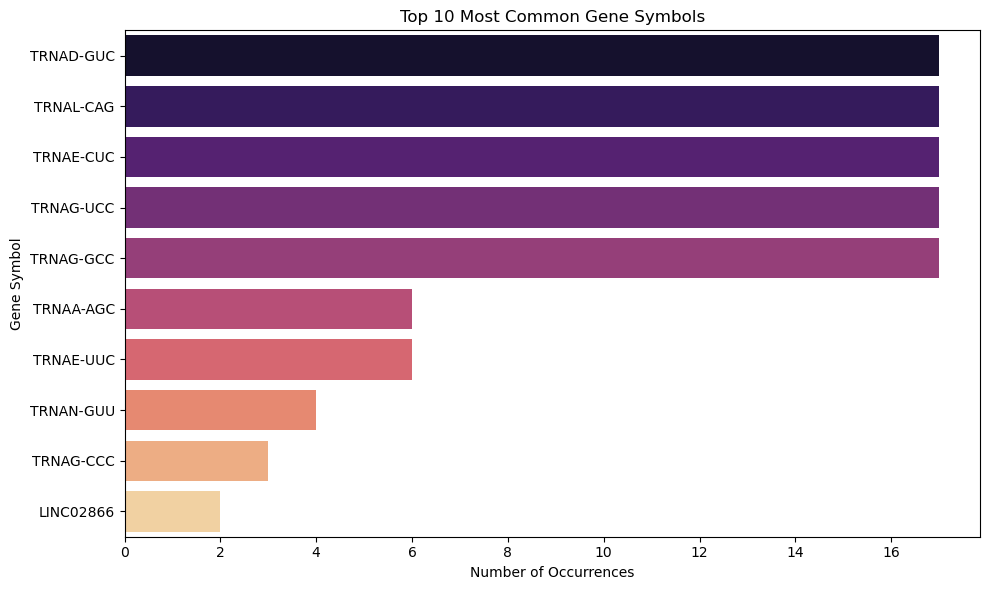

In [5]:
# Query to find the top 10 most common gene symbols
# Identify and visualize the most frequently occurring gene symbols in the database. 
# This can be useful for spotting genes that are heavily studied or represented.

query = """
SELECT Symbol, COUNT(*) AS Occurrences
FROM Gene_New
GROUP BY Symbol
ORDER BY Occurrences DESC
LIMIT 10
"""
df_common_genes = pd.read_sql(query, connection)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Occurrences', y='Symbol', data=df_common_genes, palette='magma')
plt.title('Top 10 Most Common Gene Symbols')
plt.xlabel('Number of Occurrences')
plt.ylabel('Gene Symbol')
plt.tight_layout()
plt.show()

/var/folders/pv/2m5s9svn5tzdnmz917lwq0480000gn/T/ipykernel_19929/2830001119.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gene_type = pd.read_sql(query, connection)


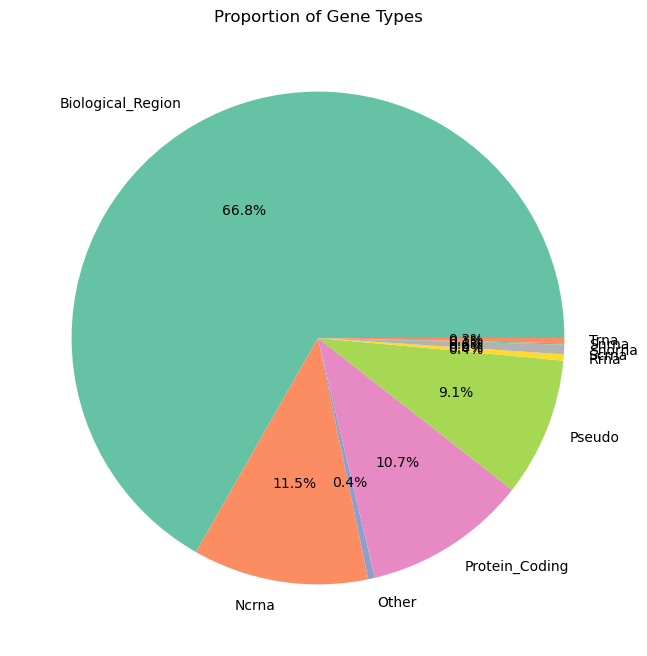

In [6]:
# Gene Type Proportion (Pie Chart)
# Show the proportion of different gene types in the dataset using a pie chart.
# Query to get gene count by type
query = "SELECT GeneType, COUNT(*) AS GeneCount FROM Gene_New GROUP BY GeneType"
df_gene_type = pd.read_sql(query, connection)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_gene_type['GeneCount'], labels=df_gene_type['GeneType'], autopct='%1.1f%%', colors=sns.color_palette('Set2', len(df_gene_type)))
plt.title('Proportion of Gene Types')
plt.show()

/var/folders/pv/2m5s9svn5tzdnmz917lwq0480000gn/T/ipykernel_19929/2944445465.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_description_length = pd.read_sql(query, connection)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


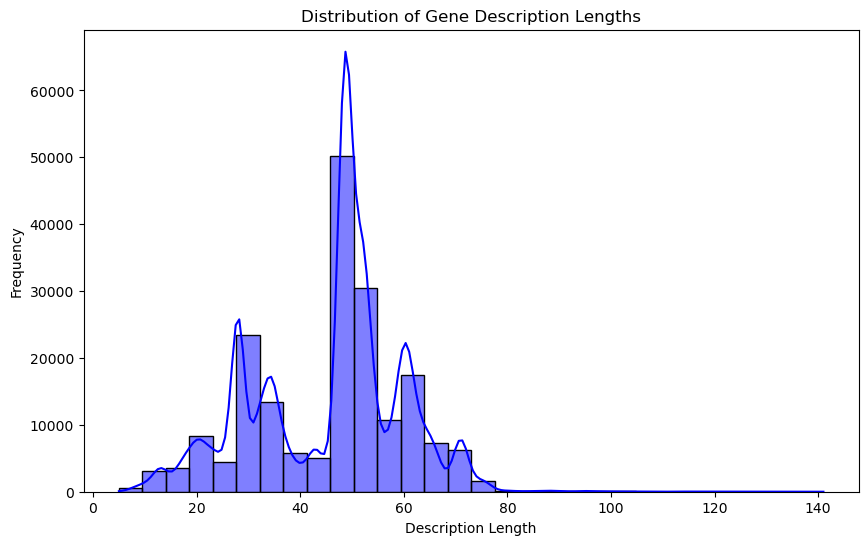

In [8]:
#  Distribution of Gene Description Lengths
# Analyze the length of gene descriptions to understand the variation in the level of detail provided.
# Query to calculate the length of each gene description
query = "SELECT LENGTH(Description) AS DescriptionLength FROM Gene_New"
df_description_length = pd.read_sql(query, connection)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df_description_length['DescriptionLength'], bins=30, kde=True, color='blue')
plt.title('Distribution of Gene Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()